### Описание проекта
Продажа продуктов питания. Нужно разобраться, как ведут себя пользователи мобильного приложения.

Изучите воронку продаж. Узнайте, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуйте результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясните, какой шрифт лучше.

### Описание данных
Каждая запись в логе — это действие пользователя, или событие.
* EventName — название события;
* DeviceIDHash — уникальный идентификатор пользователя;
* EventTimestamp — время события;
* ExpId — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

## Содержание

### [Шаг 1.](#1) Открываем файл с данными и изучаем общую информацию


### [Шаг 2.](#2) Подготовка данных
* Замена названий столбцов;
* Проверка пропусков и типов данных;
* Добавление столбца даты и времени, а также отдельный столбец дат;

[Вывод](#2c)


### [Шаг 3.](#3) Изучение и проверка данных
* [3.1](#3.1) Сколько всего событий в логе?
* [3.2](#3.2) Сколько всего пользователей в логе?
* [3.3](#3.3) Сколько в среднем событий приходится на пользователя?
* [3.4](#3.4) Данными за какой период располагаем? Найдием максимальную и минимальную дату. Построим гистограмму по дате и времени. Можно ли быть уверенным, что у нас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
* [3.5](#3.5) Много ли событий и пользователей вы потеряли, отбросив старые данные?
* [3.6](#3.6) Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

[Вывод](#3c)

### [Шаг 4.](#4) Изучение воронки событий
* [4.1](#4.1) Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
* [4.2](#4.2) Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
* [4.3](#4.3) Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
* [4.4](#4.4) По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.(#4.4)
* [4.5](#4.5) На каком шаге теряете больше всего пользователей?
* [4.6](#4.6) Какая доля пользователей доходит от первого события до оплаты?

[Вывод](#4c)

### [Шаг 5.](#5) Изучение результатов эксперимента
* [5.1](#5.1) Сколько пользователей в каждой экспериментальной группе?
* [5.2](#5.2) Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
* [5.3](#5.3) Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
* [5.4](#5.3) Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
* [5.5](#5.3) Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

### [Заключение](#6) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math as mth

Зададим стиль всех дальнейших графиков.

In [2]:
plt.style.use('ggplot')

<a id='1'></a>
### 1.  Знакомство с данными

In [3]:
# Считываем данные
df = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')

In [4]:
# Смотрим данные
df.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [5]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [6]:
# Названия столбцов
df.columns

Index(['EventName', 'DeviceIDHash', 'EventTimestamp', 'ExpId'], dtype='object')

### 1. Вывод
В нашем распоряжении 244126 записей.

<a id='2'></a>
### 2. Подготовка данных

Переименуем столбцы на более короткие и удобные названия.

In [7]:
# Переименование столбцов
df.columns = ['event_name', 'user_id', 'event_time', 'exp_id']

# Проверка
df.columns

Index(['event_name', 'user_id', 'event_time', 'exp_id'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
event_name    244126 non-null object
user_id       244126 non-null int64
event_time    244126 non-null int64
exp_id        244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Проверим наличие дубликатов.

In [9]:
df.duplicated().sum()

413

Удалим дубликаты.

In [10]:
# Удаляем дубликаты
df = df.drop_duplicates().reset_index(drop = True)

# Проверяем остались ли дубликаты
df.duplicated().sum()

0

In [11]:
df.head()

,event_name,user_id,event_time,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [12]:
# Проверяем наличие пропусков
df.isna().mean()

event_name    0.0
user_id       0.0
event_time    0.0
exp_id        0.0
dtype: float64

Добавим столбец даты и времени 'date_time'.

In [13]:
df['date_time'] = pd.to_datetime(df['event_time'], unit='s')

df.head()

,event_name,user_id,event_time,exp_id,date_time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42


Добавим столбец даты 'date'.

In [14]:
df['date'] = df['date_time'].astype('datetime64[D]')
df.sample(n=5)

,event_name,user_id,event_time,exp_id,date_time,date
8043,MainScreenAppear,5893087509399494881,1564643895,248,2019-08-01 07:18:15,2019-08-01
182224,OffersScreenAppear,6922444491712477,1565073338,246,2019-08-06 06:35:38,2019-08-06
17634,OffersScreenAppear,7238309430968098875,1564660613,248,2019-08-01 11:56:53,2019-08-01
175382,PaymentScreenSuccessful,5012718390739823765,1565037929,248,2019-08-05 20:45:29,2019-08-05
154343,MainScreenAppear,517336701210514234,1565004394,246,2019-08-05 11:26:34,2019-08-05


<a id='2c'></a>
### 2. Выводы
* Переименовали столбцы;
* Удалили 413 дубликатов;
* Пропусков в данных нет;
* Добавили столбец даты и времени 'date_time';
* Добавили столбец даты 'date';
* Типы данных соответствуют смыслу данных.

<a id='3'></a>
### 3. Изучение и проверка данных

<a id='3.1'></a>
#### 3.1 Сколько всего событий в логе?

In [15]:
# Количество событий
len(df)

243713

Таким образом в логе всего 243713 событий.

<a id='3.2'></a>
#### 3.2 Сколько всего пользователей в логе?

In [16]:
# Количество уникальных пользователей
df['user_id'].nunique()

7551

Таким образом имеем 7551 пользователя.

<a id='3.3'></a>
#### 3.3 Сколько в среднем событий приходится на пользователя?

Разделим общее количество строк(событий) на количество пользователей. Это и будет среднее количество событий на пользователя.

In [17]:
len(df) / df['user_id'].nunique()

32.27559263673685

Таким образом в среднем на одного пользователя приходится 32 события.

<a id='3.4'></a>
#### 3.4 Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?

Данными за какой период вы располагаете?

In [18]:
(df['date_time'].min(), df['date_time'].max()) 

(Timestamp('2019-07-25 04:43:36'), Timestamp('2019-08-07 21:15:17'))

Таким образом мы располагаем данными за 14 дней с 2019-07-25 по 2019-08-07.

Построим гистограмму по дате и времени.

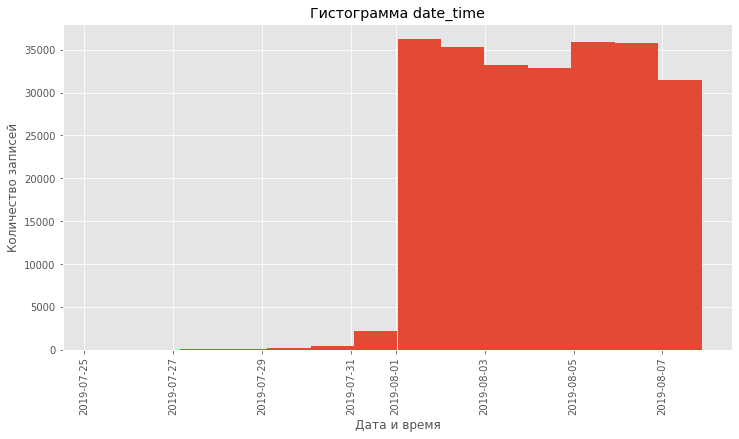

In [19]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(12, 6))

df['date_time'].hist(bins=14)

plt.title('Гистограмма date_time')
plt.ylabel('Количество записей')
plt.xlabel('Дата и время')
plt.xticks(rotation=90)

plt.show()

Из диаграммы видим, что мы обладаем не полными данными. Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Таким образом из диагрвммы видим, что полными данными ми располагаем только с 2019-08-01.

Оставим в df только полные данные, а именно только те записи, которые сделаны с 2019-08-01.

In [20]:
df = df[df['date_time'] >= '2019-08-01 00:00:00']

<a id='3.5'></a>
#### 3.5 Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [21]:
# Количество событий
len(df)

240887

In [22]:
df['event_name'].nunique()

5

Изначально было 243713 событий. Сейчас осталось 240887. Отбросив неполные данные мы потеряли 2826 событий, что составляет 1%.

In [23]:
# Количество уникальных пользователей
n_user = df['user_id'].nunique()
n_user

7534

Изначально было 7551 пользователей. Сейчас осталось 7534. Отбросив неполные данные мы потеряли 17 пользователей, что составляет 0,2%.

<a id='3.6'></a>
#### 3.6 Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

Посчитаем количество записей для каждой экспирементальной группы и количество пользователей в группе.

In [24]:
df.groupby('exp_id').agg({'exp_id': 'count', 'user_id': 'nunique'}) #['exp_id'].count()

,exp_id,user_id
exp_id,,
246,79302,2484
247,77022,2513
248,84563,2537


Таким образом мы имеем данные по экспериментальным группам 246, 247, 248.

<a id='3c'></a>
### 3. Вывод
В нашем распоряжении данные за 14 дней с 2019-07-25 по 2019-08-07. К сожалению, технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это перекашивает данные. Полные данные у тас только за период с 2019-08-01 по 2019-08-07. Удалив дни с неполными даными мы потеряли 1% всех событий и 17 пользователей из 7551, т.е. количество данных для анализа практически не пострадало. 

<a id='4'></a>
### 4. Изучение воронки событий

<a id='4.1'></a>
#### 4.1 Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [25]:
df.groupby('event_name').agg({'user_id': 'count'}).sort_values(by='user_id', ascending=False)

,user_id
event_name,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


<a id='4.2'></a>
#### 4.2 Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [26]:
user_event = df.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)
user_event

,user_id
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


Переустановим индексы и переименуем столбцы.

In [27]:
user_event = user_event.reset_index()
user_event.columns = ['event_name', 'n_user']
user_event.head()

,event_name,n_user
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


Посчитаем долю пользователей, которые хоть раз совершали событие. Для этого разделим количество пользователей в каждом событии на общее количество пользователей.

In [28]:
user_event['share'] = user_event['n_user'] / n_user
user_event

,event_name,n_user,share
0,MainScreenAppear,7419,0.984736
1,OffersScreenAppear,4593,0.609636
2,CartScreenAppear,3734,0.495620
3,PaymentScreenSuccessful,3539,0.469737
4,Tutorial,840,0.111495


На главную страницу приходит 98,5% пользователей. Скорее всего оставшиеся 1,5% заходят в приложение, которое уже было открыто ими ранее, и таким образом попадают на страницу на которой они остановились, а не на первую.

<a id='4.3'></a>
#### 4.3 Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

Судя по всему события происходят в том порядке в котором они выведены на экран. Событие Tutorial скорее всего не имеет смысла в контексте воронки продаж. 

Удалим Tutorial из user_event.

In [29]:
user_event = user_event[user_event['event_name'] != 'Tutorial']
user_event

,event_name,n_user,share
0,MainScreenAppear,7419,0.984736
1,OffersScreenAppear,4593,0.609636
2,CartScreenAppear,3734,0.495620
3,PaymentScreenSuccessful,3539,0.469737


<a id='4.4'></a>
#### 4.4 По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

* 4593 / 7419 = 62% пользователей проходит от MainScreenAppear к OffersScreenAppear.
* 3734 / 4593 = 81% пользователей проходит от OffersScreenAppear к CartScreenAppear.
* 3539 / 3734 = 95% пользователей проходит от CartScreenAppear к PaymentScreenSuccessful.

<a id='4.5'></a>
#### 4.5 На каком шаге теряете больше всего пользователей?
Больше всего пользователей теряется при переходе от события MainScreenAppear к OffersScreenAppear.

<a id='4.6'></a>
#### 4.6 Какая доля пользователей доходит от первого события до оплаты?
3539 / 7419 = 48% пользователей доходит от первого события до оплаты.

<a id='4c'></a>
### 4. Вывод
Воронка продаж выглядит следующим образом:
* 62% пользователей проходит от MainScreenAppear к OffersScreenAppear
* 81% пользователей проходит от OffersScreenAppear к CartScreenAppear
* 95% пользователей проходит от CartScreenAppear к PaymentScreenSuccessful


48% пользователей доходит от первого события до оплаты

<a id='5'></a>
### 5. Изучение результатов эксперимента

<a id='5.1'></a>
#### 5.1 Сколько пользователей в каждой экспериментальной группе?

In [30]:
df.groupby('exp_id').agg({'user_id': 'nunique'})

,user_id
exp_id,
246,2484
247,2513
248,2537


<a id='5.2'></a>
#### 5.2 Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

Проверим нет ли у нас пользователей, которые попали в несколько групп.

In [31]:
df.groupby('user_id').agg({'exp_id': 'nunique'}).max()

exp_id    1
dtype: int64

Пользователи попавшие в несколько групп отсутствуют. Различие в количестве пользователей в различных группах составляет около 1%. Разбиение на группы корректное.

<a id='5.3'></a>
#### 5.3 Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
#### 5.4 Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
#### 5.5 Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

Для выполнения пунктов 5.3, 5.4, 5.5 напишем соответствующую функцию.

Напишем функцию event_share, которая на вход будет получать: 
* events - cписок возможных событий из столбца event_name
* df_group1 - данные из df соответствующие первой группе в сравенении
* name_group1 - название первой группы
* df_group2 - данные из df соответствующие второй группе в сравенении
* name_group2 - название второй группы
* alpha - уровень значимости

а на выходе для каждого события даст нам:
* количество пользователей в каждой сравниваемой группе (у котовых произошло событие)
* разницу в количестве таких пользователей по сравниваемым группам
* долю пользователей в каждой сравниваемой группе (у котовых произошло событие)
* разницу долей таких пользователей по сравниваемым группам
* проверит нулевую гипотезу о том, что доли равны (z-тест)

In [32]:
def event_share(events, df_group1, name_group1, df_group2, name_group2, alpha):
    
    # Запускаем цикл для каждого из событий
    for event_name in events:
        print(event_name)
        
        # Отбираем данные для указанных групп для указанного события
        df_group1_event = df_group1[df_group1['event_name'] == event_name]
        df_group2_event = df_group2[df_group2['event_name'] == event_name]
        
        # Количество пользователей в группах для указанного события
        n_user_group1_event = df_group1_event['user_id'].nunique()
        n_user_group2_event = df_group2_event['user_id'].nunique()
        
        print('В группе', name_group1, 'количество пользователей у которых произошло событие', event_name, 'равно', n_user_group1_event)
        print('В группе', name_group2, 'количество пользователей у которых произошло событие', event_name, 'равно', n_user_group2_event)
        print('Разница {:.1%}'.format((n_user_group2_event /  n_user_group1_event) - 1))
        print('')
        
        # Количество пользователей в группах
        n_user_group1 = df_group1['user_id'].nunique()
        n_user_group2 = df_group2['user_id'].nunique()
        
        # Доля пользователей группы, у которых совершилось событие среди всех пользователей группы
        share_n_users_group1_event = n_user_group1_event / n_user_group1
        share_n_users_group2_event = n_user_group2_event / n_user_group2
        
        print('В группе', name_group1, 'доля пользователей у которых произошло событие', event_name, 'равна', '{:.3f}'.format(share_n_users_group1_event))
        print('В группе', name_group2, 'доля пользователей у которых произошло событие', event_name, 'равна', '{:.3f}'.format(share_n_users_group2_event))
        print('Разница {:.1%}'.format((share_n_users_group2_event /  share_n_users_group1_event) - 1))
        
        
        
        # Выясним, есть ли статистически значимая разница между долями пользователей группы, у которых совершилось событие
        
        successes = [n_user_group1_event, n_user_group2_event]
        trials = [n_user_group1, n_user_group2]
        
        # пропорция успехов в первой группе:
        p1 = successes[0]/trials[0]

        # пропорция успехов во второй группе:
        p2 = successes[1]/trials[1]

        # пропорция успехов в комбинированном датасете:
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

        # разница пропорций в датасетах
        difference = p1 - p2 
        
        # считаем статистику в ст.отклонениях стандартного нормального распределения
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

        # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
        distr = st.norm(0, 1)
        
        p_value = (1 - distr.cdf(abs(z_value))) * 2

        print('p-значение: ', p_value)

        if (p_value < alpha):
                print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
        else:
                print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными") 
        
        
        

Разделим наши данные по группам, которые требуется сравнить.

In [33]:
# Группы для сравнения
df_246 = df[df['exp_id'] == 246]
df_247 = df[df['exp_id'] == 247]
df_248 = df[df['exp_id'] == 248]
df_246_247 = df[(df['exp_id'] == 246) | (df['exp_id'] == 247)]

Выделим все события, которые нам понадобятся для передаче функции event_share.

In [34]:
events = df['event_name'].unique()
events

array(['Tutorial', 'MainScreenAppear', 'OffersScreenAppear',
       'CartScreenAppear', 'PaymentScreenSuccessful'], dtype=object)

Всего у нас будет 4 пары групп для сравнения: (246-247), (246-248), (247-248) и (248- 246&247). Имеем 5 событий в каждой паре. Таким образом мы собираемся проверить 4 x 5 = 20 нулевых гипотез о равенстве долей. Поэтому за уровень значимости примем 0.05 / 20 = 0.0025 

#### Проведем сравнение и проверку нулевой гипотезы о равенстве долей для групп A/A-теста 246 и 247.
* H0 - Доли равны
* H1 - Доли не равны

In [35]:
event_share(events, df_246, 246, df_247, 247, 0.0025)

Tutorial
В группе 246 количество пользователей у которых произошло событие Tutorial равно 278
В группе 247 количество пользователей у которых произошло событие Tutorial равно 283
Разница 1.8%

В группе 246 доля пользователей у которых произошло событие Tutorial равна 0.112
В группе 247 доля пользователей у которых произошло событие Tutorial равна 0.113
Разница 0.6%
p-значение:  0.9376996189257114
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
MainScreenAppear
В группе 246 количество пользователей у которых произошло событие MainScreenAppear равно 2450
В группе 247 количество пользователей у которых произошло событие MainScreenAppear равно 2476
Разница 1.1%

В группе 246 доля пользователей у которых произошло событие MainScreenAppear равна 0.986
В группе 247 доля пользователей у которых произошло событие MainScreenAppear равна 0.985
Разница -0.1%
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
O

#### Выводы A/A-тест, сравнение групп 246 и 247
* Нет ни одного события для которого разница обоих показателей между группами не превышала бы 1%
* Самое многочисленное событие MainScreenAppear имеет разницу в показателях между группами 1.1% и -0.1%
* Разница между долями для всех событий не является статистически значимой
* Также видно, что чем более многочисленное событие, тем меньше разница в показателях между группами, что указывает на то, что для достижения разницы между всеми показателями не более 1% (что будет говорить о успешности A/A-теста) необходимо собрать данные за больший период времени. Разбиение на группы работает корректно.

#### Проведем сравнение и проверку нулевой гипотезы о равенстве долей для групп A/B-теста 246 и 248.
* H0 - Доли равны
* H1 - Доли не равны

In [36]:
event_share(events, df_246, 246, df_248, 248, 0.0025)

Tutorial
В группе 246 количество пользователей у которых произошло событие Tutorial равно 278
В группе 248 количество пользователей у которых произошло событие Tutorial равно 279
Разница 0.4%

В группе 246 доля пользователей у которых произошло событие Tutorial равна 0.112
В группе 248 доля пользователей у которых произошло событие Tutorial равна 0.110
Разница -1.7%
p-значение:  0.8264294010087645
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
MainScreenAppear
В группе 246 количество пользователей у которых произошло событие MainScreenAppear равно 2450
В группе 248 количество пользователей у которых произошло событие MainScreenAppear равно 2493
Разница 1.8%

В группе 246 доля пользователей у которых произошло событие MainScreenAppear равна 0.986
В группе 248 доля пользователей у которых произошло событие MainScreenAppear равна 0.983
Разница -0.4%
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Выводы A/B-тест, сравнение групп 246 и 248
Разница между долями для всех событий не является статистически значимой.

#### Проведем сравнение и проверку нулевой гипотезы о равенстве долей для групп A/B-теста 247 и 248.
* H0 - Доли равны
* H1 - Доли не равны

In [37]:
event_share(events, df_247, 247, df_248, 248, 0.0025)

Tutorial
В группе 247 количество пользователей у которых произошло событие Tutorial равно 283
В группе 248 количество пользователей у которых произошло событие Tutorial равно 279
Разница -1.4%

В группе 247 доля пользователей у которых произошло событие Tutorial равна 0.113
В группе 248 доля пользователей у которых произошло событие Tutorial равна 0.110
Разница -2.3%
p-значение:  0.765323922474501
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
MainScreenAppear
В группе 247 количество пользователей у которых произошло событие MainScreenAppear равно 2476
В группе 248 количество пользователей у которых произошло событие MainScreenAppear равно 2493
Разница 0.7%

В группе 247 доля пользователей у которых произошло событие MainScreenAppear равна 0.985
В группе 248 доля пользователей у которых произошло событие MainScreenAppear равна 0.983
Разница -0.3%
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


#### Выводы A/B-тест, сравнение групп 247 и 248
Разница между долями для всех событий не является статистически значимой.

#### Проведем сравнение и проверку нулевой гипотезы о равенстве долей для групп A/B-теста 248 и (246 & 247).
* H0 - Доли равны
* H1 - Доли не равны

In [38]:
event_share(events, df_246_247, '246 & 247', df_248, 248, 0.0025)

Tutorial
В группе 246 & 247 количество пользователей у которых произошло событие Tutorial равно 561
В группе 248 количество пользователей у которых произошло событие Tutorial равно 279
Разница -50.3%

В группе 246 & 247 доля пользователей у которых произошло событие Tutorial равна 0.112
В группе 248 доля пользователей у которых произошло событие Tutorial равна 0.110
Разница -2.0%
p-значение:  0.764862472531507
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
MainScreenAppear
В группе 246 & 247 количество пользователей у которых произошло событие MainScreenAppear равно 4926
В группе 248 количество пользователей у которых произошло событие MainScreenAppear равно 2493
Разница -49.4%

В группе 246 & 247 доля пользователей у которых произошло событие MainScreenAppear равна 0.986
В группе 248 доля пользователей у которых произошло событие MainScreenAppear равна 0.983
Разница -0.3%
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет осн

#### Выводы A/B-тест, сравнение групп 248 и (246 & 247)
Разница между долями для всех событий не является статистически значимой.

<a id='6'></a>
### Заключение
Воронка продаж выглядит следующим образом:
* 62% пользователей проходит от MainScreenAppear к OffersScreenAppear
* 81% пользователей проходит от OffersScreenAppear к CartScreenAppear
* 95% пользователей проходит от CartScreenAppear к PaymentScreenSuccessful

48% пользователей доходит от первого события до оплаты.

A/A, A/B тесты:
* Разделение на группы работает корректно
* Различия в показателях по имеющимся данным не являются статистически значимыми
* Не удалось установить для различных шрифтов статистически значимых различий для долей пользователей совершивших событие

Все указывает на то, что можно смело менять шрифты, и что замена никак не скажется на поведении пользователей.